# <center> Data Visualizations </center>

# Contents:
## 01. Import libraries & data
## 02. PII data check
## 03. Derive region column 
## 04. Derive exclusion flag for low activity customers. 
## 05. Derive profile variables:
###     - Age_Profile
###     - Income_profile
###     - Departments_profile
## 06. Create visulizations

## <center> 01. Import libraries & data </center>

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
path = r'C:\Users\thang\Desktop\Data Analytics\Data Analytics Immersion\Python\Instacart Basket Analysis'

In [3]:
data = pd.read_pickle(os.path.join(path,'2. Data','Modified','Instacart_Data_New_Variables.pkl'))

## <center> 02. PII data check </center>

In [4]:
pd.options.display.max_columns = None
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,first_name,last_name,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer


In [10]:
data.shape

(32404859, 27)

In [5]:
# drop 'first_name' & 'last_name' columns because they are personally identifiable information.
data.drop(columns = ['first_name','last_name'], inplace = True)

In [6]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer


## <center> 03. Derive region column </center>

In [7]:
# Filter the states by 4 regions: Northeast, Midwest, West, South
# create a list of states for each region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# use loc fucntion to filter the states by region
data.loc[data['state'].isin(Northeast), 'region'] = 'Northeast'
data.loc[data['state'].isin(Midwest), 'region'] = 'Midwest'
data.loc[data['state'].isin(South), 'region'] = 'South'
data.loc[data['state'].isin(West), 'region'] = 'West'

In [9]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South


In [9]:
# check the value counts of region column
data['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### Determine spending habits in each region.

In [11]:
# Determine spending habits in each region
# Use crosstab to compare spending flags by region
crosstab = pd.crosstab(data['region'], data['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,140195,7457130
Northeast,98231,5624505
South,187214,10604671
West,142003,8150910


### <font color='red'> South region has the highest number of low & high spenders. Northeast region has the least number of high and low spenders. </font>

## <center> 04. Derive an exclusion flag for low-activity customers</center>

In [13]:
# derive the exclusion_flag based on max order number of 5. 
data.loc[data['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'
data.loc[data['max_order'] >= 5, 'exclusion_flag'] = 'High-activity customer'

In [14]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer


In [15]:
# check exclusion_flag column
data['exclusion_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: exclusion_flag, dtype: int64

In [16]:
# create a subset containing ONLY high-activity customers 
new_data= data[data['exclusion_flag'] == 'High-activity customer']

In [18]:
new_data.shape

(30964564, 28)

In [17]:
# check the exclusion_flag column on the subset 
new_data['exclusion_flag'].value_counts(dropna = False)

High-activity customer    30964564
Name: exclusion_flag, dtype: int64

In [19]:
# export the subset 
new_data.to_pickle(os.path.join(path, '2. Data', 'Modified', 'Instacart_Data_High_Activity_Customers.pkl'))

## <center> 05. Create profile variables </center>

In [4]:
data_excluded = pd.read_pickle(os.path.join(path, '2. Data', 'Modified', 'Instacart_Data_High_Activity_Customers.pkl'))

In [4]:
pd.options.display.max_columns = None
data_excluded.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,High-activity customer


In [ ]:
# Drop exclusion_flag because it's no longer needed 
data_excluded.drop(columns = 'exclusion_flag', inplace = True)

In [6]:
# find stats of age, income, & n_dependants to create groups 
data_excluded[['age','income','n_dependants']].describe()

,age,income,n_dependants
count,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,9.967587e+04,1.501819e+00
std,1.848528e+01,4.314187e+04,1.118896e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.729200e+04,1.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00
75%,6.500000e+01,1.281020e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


### Age:

In [7]:
# create age_profile column based on age groups 
# 18 Years to 29 Years - Young Adult
# 30 Years to 44 Years - Middle-aged Adult
# 45 Years to 60 Years - Old-aged Adult
# Over 65 Years - Senior
data_excluded.loc[(data_excluded['age'] >= 18) & (data_excluded['age'] < 30), 'age_profile'] = 'Young adult'
data_excluded.loc[(data_excluded['age'] >= 30) & (data_excluded['age'] < 45), 'age_profile'] = 'Middle-aged adult'
data_excluded.loc[(data_excluded['age'] >= 45) & (data_excluded['age'] < 65), 'age_profile'] = 'Old-aged adult'
data_excluded.loc[data_excluded['age'] >= 65, 'age_profile'] = 'Senior'

In [8]:
# check the counts 
data_excluded['age_profile'].value_counts(dropna = False)

Old-aged adult       9690051
Senior               8195544
Middle-aged adult    7261366
Young adult          5817603
Name: age_profile, dtype: int64

### Income:

In [9]:
# create income_profile column based on income groups 
# Less than $52,000 - Low Income
# $52,000 to 156,000 - Middle Income
# Over $156,000 - High Income
data_excluded.loc[data_excluded['income'] < 52200, 'income_profile'] = 'Low income'
data_excluded.loc[(data_excluded['income'] >= 52200) & (data_excluded['income'] <= 156600), 'income_profile'] = 'Middle income'
data_excluded.loc[data_excluded['income'] > 156600, 'income_profile'] = 'High income'

In [10]:
# check the counts 
data_excluded['income_profile'].value_counts(dropna = False)

Middle income    24541393
Low income        3691708
High income       2731463
Name: income_profile, dtype: int64

### Departments

In [4]:
# get the dictionary for department_id
dep = pd.read_pickle(os.path.join(path, '2. Data', 'Modified', 'departments_wrangled.pkl'))

In [17]:
data_dict = dep.to_dict('department_id')

C:\Users\thang\AppData\Local\Temp\ipykernel_13092\3727544898.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  data_dict = dep.to_dict('department_id')


In [18]:
data_dict

{'department': {'1': 'frozen',
  '2': 'other',
  '3': 'bakery',
  '4': 'produce',
  '5': 'alcohol',
  '6': 'international',
  '7': 'beverages',
  '8': 'pets',
  '9': 'dry goods pasta',
  '10': 'bulk',
  '11': 'personal care',
  '12': 'meat seafood',
  '13': 'pantry',
  '14': 'breakfast',
  '15': 'canned goods',
  '16': 'dairy eggs',
  '17': 'household',
  '18': 'babies',
  '19': 'snacks',
  '20': 'deli',
  '21': 'missing'}}

In [20]:
# create 'department_profile' column for bakery, produce, beverages, meat seafood, & snacks (picked by me)
data_excluded.loc[data_excluded['department_id'] == 3, 'department_profile'] = 'bakery'
data_excluded.loc[data_excluded['department_id'] == 4, 'department_profile'] = 'produce'
data_excluded.loc[data_excluded['department_id'] == 7, 'department_profile'] = 'beverages'
data_excluded.loc[data_excluded['department_id'] == 12, 'department_profile'] = 'meat seafood'
data_excluded.loc[data_excluded['department_id'] == 19, 'department_profile'] = 'snacks'

In [21]:
# check the counts of 'department_profile' column
data_excluded['department_profile'].value_counts(dropna = False)

NaN             14751375
produce          9079273
snacks           2766406
beverages        2571901
bakery           1120828
meat seafood      674781
Name: department_profile, dtype: int64

In [22]:
# fill NaN values with 'others'
data_excluded['department_profile'].fillna('others', inplace = True)

## <center> 06. Create visualizations </center>

In [10]:
pd.options.display.max_columns = None
data_excluded.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,age_profile,income_profile,department_profile
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,Middle-aged adult,Low income,beverages
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,Middle-aged adult,Low income,beverages
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,Middle-aged adult,Low income,beverages
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,Middle-aged adult,Low income,beverages
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer,South,Middle-aged adult,Low income,beverages


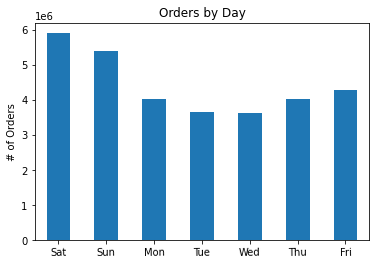

In [11]:
# busiest_days of the week
bar_busiest_day = data_excluded['order_day_of_week'].value_counts().sort_index().plot.bar(rot=1, title = 'Orders by Day', ylabel = '# of Orders').set_xticklabels(['Sat','Sun','Mon','Tue','Wed','Thu','Fri'])

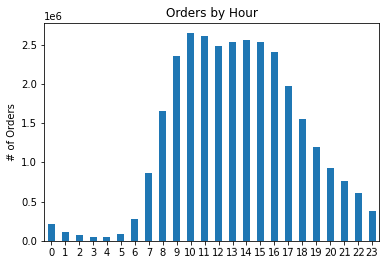

In [12]:
# busiest hours of the day
bar_busiest_hour = data_excluded['order_hour_of_day'].value_counts().sort_index().plot.bar(rot=1, title = 'Orders by Hour', ylabel = '# of Orders')

In [60]:
# data sampling for line charts
np.random.seed(1)
dev = np.random.rand(len(data_excluded)) <= 0.7

small = data_excluded[~dev]

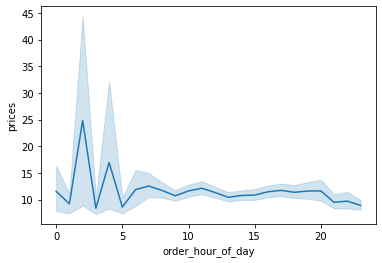

In [61]:
sample = small[['order_hour_of_day','prices']]
line_revenue_hour = sns.lineplot(data = sample, x = 'order_hour_of_day', y = 'prices')

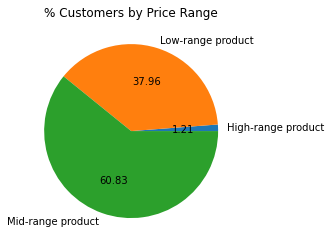

In [13]:
# price rage 
pie_price_range = data_excluded['price_range'].value_counts().sort_values().plot.pie(autopct = '%.2f', ylabel = "", title = '% Customers by Price Range')

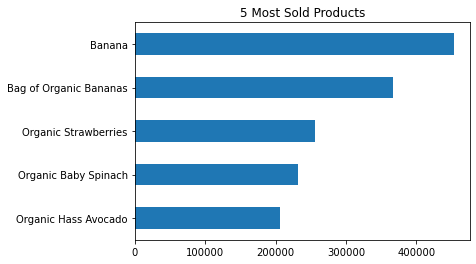

In [32]:
# product
bar_best_product = data_excluded['product_name'].value_counts().head(5).sort_values().plot.barh(title = '5 Most Sold Products')

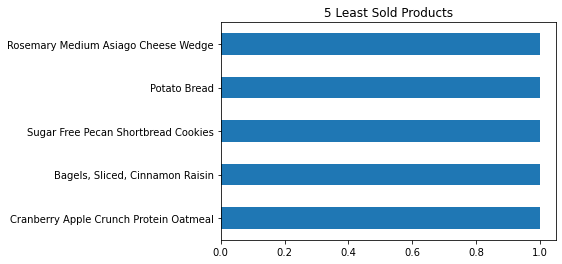

In [33]:
bar_worst_product = data_excluded['product_name'].value_counts().tail(5).sort_values().plot.barh(title = '5 Least Sold Products')

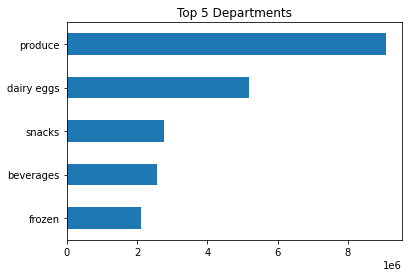

In [35]:
# department
bar_best_department = data_excluded['department_id'].value_counts().head(5).sort_values().plot.barh(title = 'Top 5 Departments').set_yticklabels(['frozen','beverages','snacks','dairy eggs','produce'])

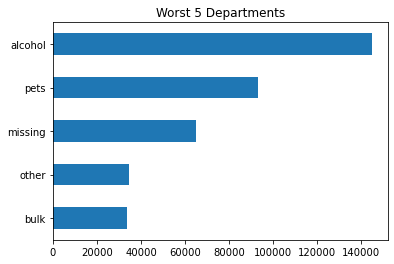

In [36]:
bar_worst_department = data_excluded['department_id'].value_counts().tail(5).sort_values().plot.barh(title = 'Worst 5 Departments').set_yticklabels(['bulk','other','missing','pets','alcohol'])

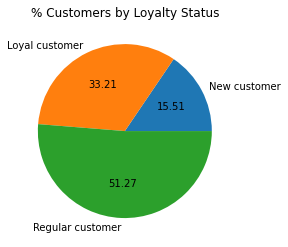

In [23]:
# customer loyalty 
pie_loyalty = data_excluded['loyalty_flag'].value_counts().sort_values().plot.pie(autopct = '%.2f', ylabel = "", title = '% Customers by Loyalty Status')

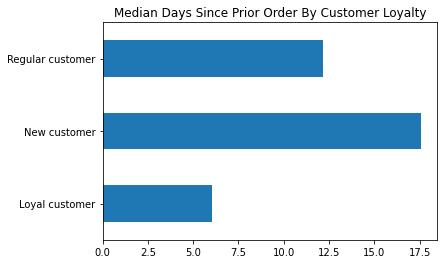

In [15]:
# median days since prior order by customer loyalty
bar_mdspo_loyalty = data_excluded.groupby('loyalty_flag').agg({'days_since_prior_order':'mean'}).plot.barh(title = 'Median Days Since Prior Order By Customer Loyalty', legend = False, xlabel = "")

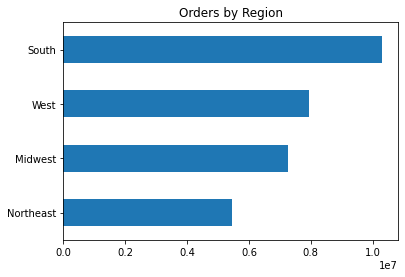

In [39]:
# region
bar_region = data_excluded['region'].value_counts().sort_values().plot.barh(title = 'Orders by Region')

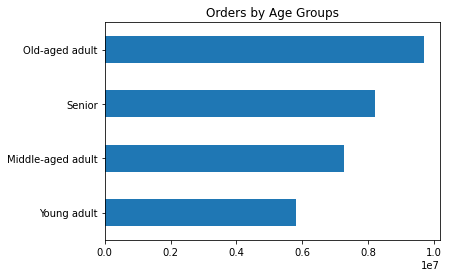

In [54]:
# age_profile
bar_age_profile = data_excluded['age_profile'].value_counts().sort_values().plot.barh(title = 'Orders by Age Groups')

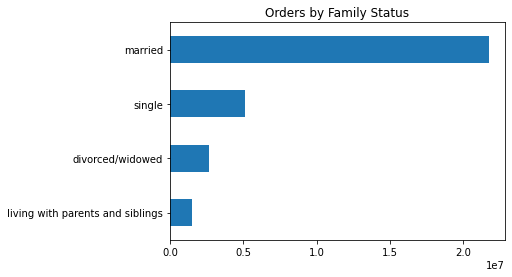

In [38]:
# family status 
bar_fam_status = data_excluded['fam_status'].value_counts().sort_values().plot.barh(title = 'Orders by Family Status')

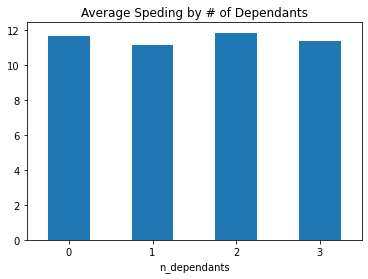

In [11]:
n_dependants = data_excluded.groupby('n_dependants').agg({'prices':'mean'}).plot.bar(rot = 1, title = 'Average Speding by # of Dependants', legend = False).setylim(0,)

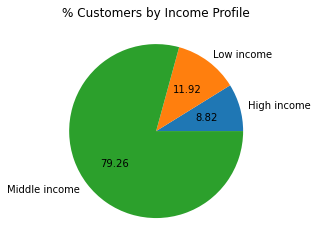

In [15]:
# income_profile
pie_income_profile = data_excluded['income_profile'].value_counts().sort_values().plot.pie(autopct = '%.2f', ylabel = "", title = '% Customers by Income Profile')

In [6]:
# age & family status 
data_excluded.groupby(['fam_status','n_dependants']).agg({'age':'mean'})

age
fam_status                       n_dependants           
divorced/widowed                 0             70.510585
                                 1                   NaN
                                 2                   NaN
                                 3                   NaN
living with parents and siblings 0                   NaN
                                 1             19.501753
                                 2             19.541836
                                 3             19.463004
married                          0                   NaN
                                 1             51.448422
                                 2             51.587213
                                 3             51.451197
single                           0             38.600037
                                 1                   NaN
                                 2                   NaN
                                 3                   NaN

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency & expenditure.

In [17]:
# customer_loyalty
data_excluded.groupby('loyalty_flag').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

order_number                prices               
                          max min       mean    max min       mean
loyalty_flag                                                      
Loyal customer             99   1  32.641196  99999   1   9.945181
New customer               10   1   4.268295  99999   1  12.945074
Regular customer           40   1  12.347452  99999   1  12.053843

In [18]:
# fam_status
data_excluded.groupby('fam_status').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

order_number                prices      \
                                          max min       mean    max min   
fam_status                                                                
divorced/widowed                           99   1  17.993361  99999   1   
living with parents and siblings           99   1  18.000712  99999   1   
married                                    99   1  17.778735  99999   1   
single                                     99   1  17.939521  99999   1   

                                             
                                       mean  
fam_status                                   
divorced/widowed                  11.091052  
living with parents and siblings  10.448030  
married                           11.502619  
single                            11.956974

In [19]:
# income_profile
data_excluded.groupby('income_profile').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

order_number                prices               
                        max min       mean    max min       mean
income_profile                                                  
High income              99   1  18.243237  99999   1  39.427934
Low income               99   1  16.904171     25   1   6.329082
Middle income            99   1  17.928502  99999   1   9.159075

In [20]:
# spending_flag
data_excluded.groupby('spending_flag').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

order_number                prices                
                       max min       mean    max min        mean
spending_flag                                                   
High spender            99   1  19.458634  99999   1  241.728724
Low spender             99   1  17.804880     25   1    7.344534

In [21]:
# order_frequency_flag
data_excluded.groupby('order_frequency_flag').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

order_number                prices               
                               max min       mean    max min       mean
order_frequency_flag                                                   
Frequent customer               99   1  25.610965  99999   1  11.067555
Non-frequent customer           22   1   4.983684  99999   1  11.673278
Regular customer                52   1  10.216992  99999   1  12.023075

### Compare customer profiles and identify a link between regions & departments. 

In [56]:
# crosstabing region & department_profile columns
region_dep = pd.crosstab(data_excluded['region'], data_excluded['department_profile'], dropna = False)

In [57]:
region_dep 

department_profile,bakery,beverages,meat seafood,others,produce,snacks
region,,,,,,
Midwest,261753,598979,158260,3463263,2134115,645143
Northeast,199300,462929,118571,2597727,1593004,493154
South,371620,859419,224120,4911724,3027476,916780
West,288155,650574,173830,3778661,2324678,711329


In [22]:
# customer_loyalty & region 
loyalty_region = pd.crosstab(data_excluded['loyalty_flag'], data_excluded['region'], dropna = False)

In [23]:
loyalty_region

region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,2373774,1841785,3405844,2662690
New customer,1136761,842156,1593664,1231114
Regular customer,3750978,2780744,5311631,4033423


In [24]:
# fam_status & region
fam_status_region = pd.crosstab(data_excluded['fam_status'], data_excluded['region'], dropna = False)

In [25]:
fam_status_region

region,Midwest,Northeast,South,West
fam_status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


In [26]:
# income_profile & region
income_profile_region = pd.crosstab(data_excluded['income_profile'], data_excluded['region'], dropna = False)

In [27]:
income_profile_region

region,Midwest,Northeast,South,West
income_profile,,,,
High income,635230,475835,920051,700347
Low income,864462,648484,1257064,921698
Middle income,5761821,4340366,8134024,6305182


In [28]:
# spending_flag & region
spending_flag_region = pd.crosstab(data_excluded['spending_flag'], data_excluded['region'], dropna = False)

In [29]:
spending_flag_region

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,135467,94983,180338,137104
Low spender,7126046,5369702,10130801,7790123


In [34]:
# order_frequency_flag & region
order_frequency_region = pd.crosstab(data_excluded['order_frequency_flag'], data_excluded['region'], dropna = False)

In [32]:
order_frequency_region

region,Midwest,Northeast,South,West
order_frequency_flag,,,,
Frequent customer,3749776,2898566,5386210,4200029
Non-frequent customer,637879,469569,898005,679846
Regular customer,2873858,2096550,4026924,3047352


## 09. Export the final dataset.

In [24]:
# downcasting 
data_excluded.dtypes

order_id                            int32
customer_id                         int32
order_number                         int8
order_day_of_week                    int8
order_hour_of_day                    int8
days_since_prior_order            float64
product_id                          int32
product_name                       object
aisle_id                            int16
department_id                        int8
prices                              int32
gender                           category
state                            category
age                                  int8
n_dependants                         int8
fam_status                       category
income                              int32
price_range                        object
busiest_day                      category
busiest_hour                     category
max_order                            int8
loyalty_flag                     category
average_price                       int16
spending_flag                    c

In [25]:
data_excluded['age_profile'] = data_excluded['age_profile'].astype('category')
data_excluded['income_profile'] = data_excluded['income_profile'].astype('category')
data_excluded['department_profile'] = data_excluded['department_profile'].astype('category')

In [26]:
# export
data_excluded.to_pickle(os.path.join(path, '2. Data', 'Modified', 'Instacart_Data_Final.pkl'))